# EDA - Visualização 

**OBJETIVOS**: Explorar por meio de bibliotecas gráficas os dados de educação

---

## Cabeçalho 

### Imports 

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import cufflinks as cf

from pathlib import Path
from plotly.offline import init_notebook_mode
from plotly.offline import plot
from plotly.offline import iplot

### Configurações

In [2]:
%config Completer.use_jedi = False
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

---

In [3]:
dm = pd.read_parquet("../dados/completo/datamart/dm_escola.parquet", columns=[
    "ID_ESCOLA", "CO_MUNICIPIO", "ANO", "TP_DEPENDENCIA", "QT_DESKTOP_ALUNO", "NU_ALUNO_POR_DOCENTE", "IDEB_AI", "IDEB_AF"
])

---

In [4]:
brasil = (
    dm.loc[lambda f: f["ANO"].isin([2013, 2015, 2017, 2019])]
    .groupby(["ANO"])[["IDEB_AI", "IDEB_AF"]]
    .mean()
    .reset_index()
    .dropna()
)

---

## Matplotlib 

In [5]:
ano = 2021
razao = 12
display(f"Evolução do ideb ano a ano mostra que o IDEB de {ano} aumentou em {razao}%")

'Evolução do ideb ano a ano mostra que o IDEB de 2021 aumentou em 12%'

Text(0, 0.5, 'IDEB')

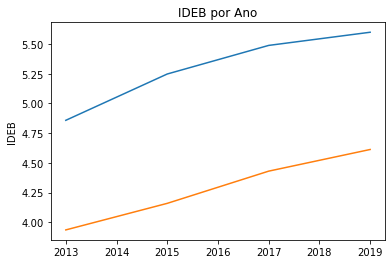

In [6]:
plt.plot(brasil["ANO"], brasil["IDEB_AI"])
plt.plot(brasil["ANO"], brasil["IDEB_AF"])
plt.title("IDEB por Ano")
plt.ylabel("IDEB")

Text(0, 0.5, 'IDEB')

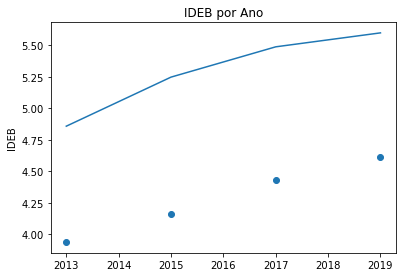

In [7]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(brasil["ANO"], brasil["IDEB_AI"])
axes.scatter(brasil["ANO"], brasil["IDEB_AF"])
axes.set_title("IDEB por Ano")
axes.set_ylabel("IDEB")

---

## Pandas Built-in 

<AxesSubplot:title={'center':'IDEB por Ano'}, xlabel='Ano', ylabel='IDEB'>

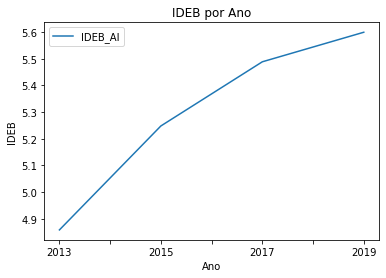

In [8]:
brasil.plot(x="ANO", y="IDEB_AI", xlabel="Ano", ylabel="IDEB", title="IDEB por Ano")

<AxesSubplot:>

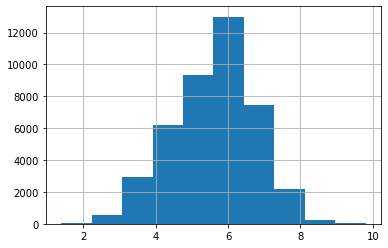

In [9]:
dm.loc[lambda f: f["ANO"] == 2020]["IDEB_AI"].hist()

<AxesSubplot:xlabel='TP_DEPENDENCIA'>

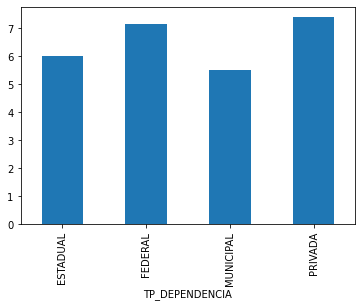

In [10]:
dm.loc[lambda f: f["ANO"] == 2020].groupby(["TP_DEPENDENCIA"])["IDEB_AI"].mean().plot.bar()

<AxesSubplot:xlabel='IDEB_AI', ylabel='NU_ALUNO_POR_DOCENTE'>

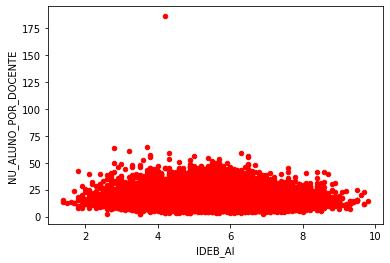

In [11]:
dm.loc[lambda f: f["ANO"] == 2020].plot.scatter(x="IDEB_AI", y="NU_ALUNO_POR_DOCENTE", color="red")

---

## Seaborn 

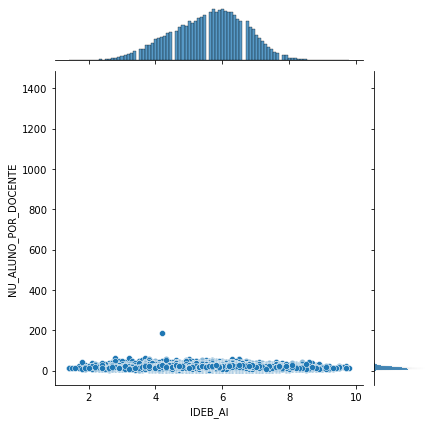

In [12]:
sns.jointplot(data=dm.loc[lambda f: f["ANO"] == 2020], x="IDEB_AI", y="NU_ALUNO_POR_DOCENTE", kind="scatter")

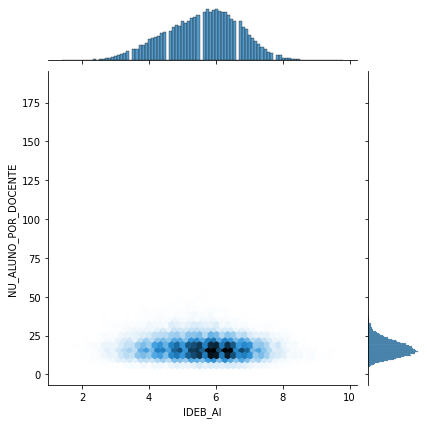

In [13]:
sns.jointplot(data=dm.loc[lambda f: f["ANO"] == 2020], x="IDEB_AI", y="NU_ALUNO_POR_DOCENTE", kind="hex")

<AxesSubplot:xlabel='TP_DEPENDENCIA', ylabel='IDEB_AI'>

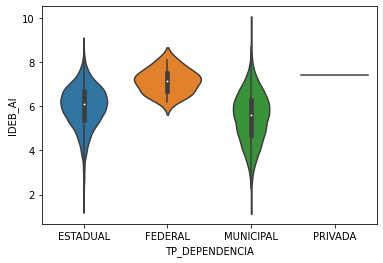

In [15]:
sns.violinplot(
    data=dm.loc[lambda f: f["ANO"] == 2020],
    x="TP_DEPENDENCIA",
    y="IDEB_AI",
)

<AxesSubplot:xlabel='IDEB_AI', ylabel='NU_ALUNO_POR_DOCENTE'>

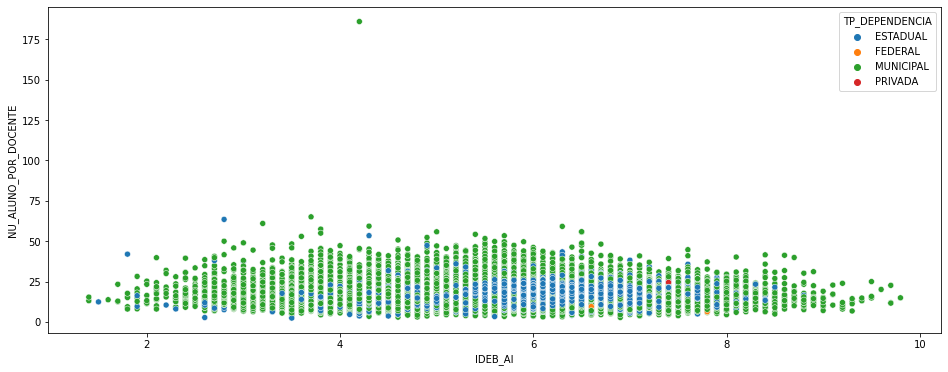

In [16]:
plt.figure(figsize=(16, 6))
sns.scatterplot(
    data=dm.loc[lambda f: f["ANO"] == 2020],
    x="IDEB_AI",
    y="NU_ALUNO_POR_DOCENTE",
    hue="TP_DEPENDENCIA",
)

<AxesSubplot:xlabel='IDEB_AI', ylabel='Count'>

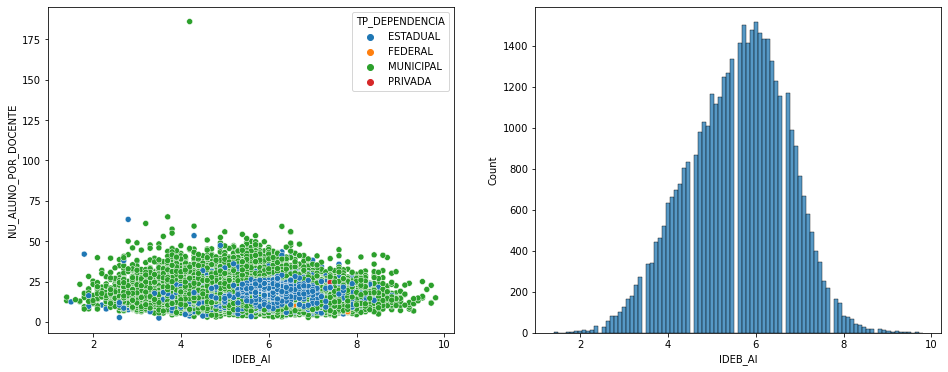

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(
    ax=axes[0],
    data=dm.loc[lambda f: f["ANO"] == 2020],
    x="IDEB_AI",
    y="NU_ALUNO_POR_DOCENTE",
    hue="TP_DEPENDENCIA",
)
sns.histplot(
    ax=axes[1],
    data=dm.loc[lambda f: f["ANO"] == 2020],
    x="IDEB_AI", 
)

---

## Geoplot

In [18]:
mun = gpd.read_file("zip://../dados/completo/externo/BR_Municipios_2020.zip")

In [19]:
mun = mun.assign(CD_MUN=lambda f: f["CD_MUN"].astype("int")).merge(
    dm.groupby(["CO_MUNICIPIO"])["IDEB_AI"].mean().reset_index(),
    left_on="CD_MUN",
    right_on="CO_MUNICIPIO",
    how="left"
)

C:\ProgramData\Anaconda3\envs\curso-ciencia-dados\lib\site-packages\geoplot\geoplot.py:66: UserWarning:

The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.

C:\ProgramData\Anaconda3\envs\curso-ciencia-dados\lib\site-packages\geoplot\geoplot.py:1004: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



<AxesSubplot:>

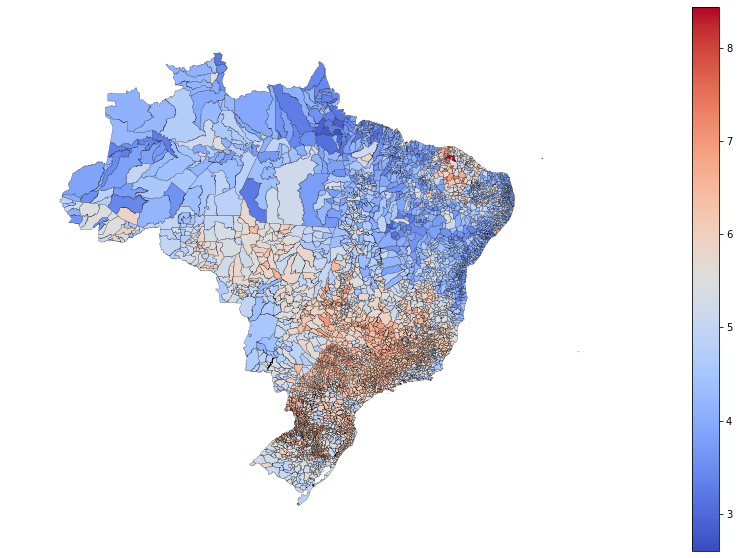

In [20]:
gplt.choropleth(
    mun,
    hue=mun["IDEB_AI"],
    cmap="coolwarm",
    figsize=(20, 10),
    legend=True,
    edgecolor="black",
    linewidth=0.2
)

---

## Plotly 

In [21]:
dm.loc[lambda f: f["ANO"] == 2020].sample(3000).iplot(
    kind="scatter", x="IDEB_AI", y="NU_ALUNO_POR_DOCENTE", mode="markers"
)

---